# 6.5 Unsupervised Machine Learning
## Script Content
#### 01 importing libraries
#### 02 importing data sets
#### 03 elbow technique
#### 04 K-means clustering
#### 05 Interpretaion of clusters
#### 06 Conclusion and Future applications

## 01 importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


## 02 importing data sets

In [2]:
df = pd.read_csv(r"C:\Users\pshan\Downloads\part 6\Data\Produced Data set\world_happiness.csv")

In [3]:
# printing the data (head and tail)
df

,country,happiness_rank,happiness_score,economy_(gdp_per_capita),family,health_(life_expectancy),freedom,trust_(government_corruption),generosity,year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,2019
778,Tanzania,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,2019
779,Afghanistan,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,2019
780,Central African Republic,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,2019


In [47]:
# shape of data 
df.shape

(781, 11)

In [16]:
df.columns

Index(['country', 'happiness_rank', 'happiness_score',
       'economy_(gdp_per_capita)', 'family', 'health_(life_expectancy)',
       'freedom', 'trust_(government_corruption)', 'generosity', 'year'],
      dtype='object')

## 03 Elbow Technique

In [17]:
# Remove categorical columns
numerical_data = df.drop(columns=['country', 'year'])

In [29]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [31]:
score = [kmeans[i].fit(numerical_data).score(numerical_data) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\pshan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pshan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\pshan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pshan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[-1592211.4397552984,
 -398760.0535903799,
 -177463.50361679637,
 -99978.35676912365,
 -64035.02228570268,
 -44627.174238219195,
 -32803.93646101578,
 -25145.00265753112,
 -19985.87276358108]

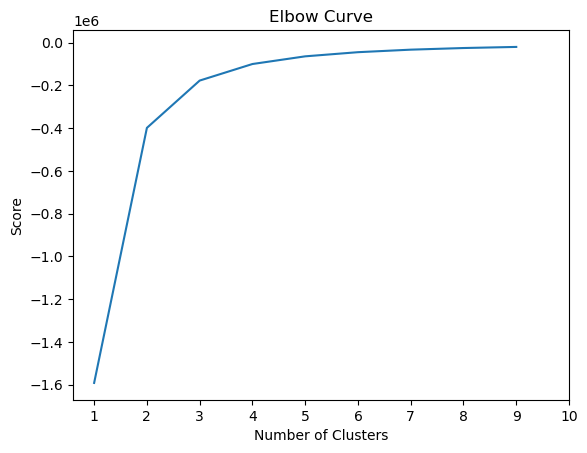

In [39]:
# Plot the elbow curve using PyLab.
plt.plot(num_cl,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.xticks(range_k)
plt.show()

## 04 K-means clustering

### Choosing k=3
#### Choosing k=3 provides a balance between simplicity and capturing meaningful cluster structures. Adding more clusters (e.g., k=4, k=5) might overfit or complicate the interpretation without substantial improvement.
##### Thus, k=3 appears to be the optimal choice here


In [34]:

# Run K-means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(standardized_data)

# Add cluster labels to the original dataset
df['Cluster'] = kmeans.labels_



C:\Users\pshan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pshan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\pshan\AppData\Local\Temp\ipykernel_8128\454875212.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.labels_


In [35]:
# Display the first few rows of the dataset with cluster assignments
print(df.head())


       country  happiness_rank  happiness_score  economy_(gdp_per_capita)  \
0  Switzerland               1            7.587                   1.39651   
1      Iceland               2            7.561                   1.30232   
2      Denmark               3            7.527                   1.32548   
3       Norway               4            7.522                   1.45900   
4       Canada               5            7.427                   1.32629   

    family  health_(life_expectancy)  freedom  trust_(government_corruption)  \
0  1.34951                   0.94143  0.66557                        0.41978   
1  1.40223                   0.94784  0.62877                        0.14145   
2  1.36058                   0.87464  0.64938                        0.48357   
3  1.33095                   0.88521  0.66973                        0.36503   
4  1.32261                   0.90563  0.63297                        0.32957   

   generosity  year  Cluster  
0     0.29678  2015      

In [36]:
df['Cluster'].value_counts()

Cluster
1    367
0    277
2    137
Name: count, dtype: int64

#### 01 creatinng scatter plot using 'economy_(gdp_per_capita)', 'happiness_score'

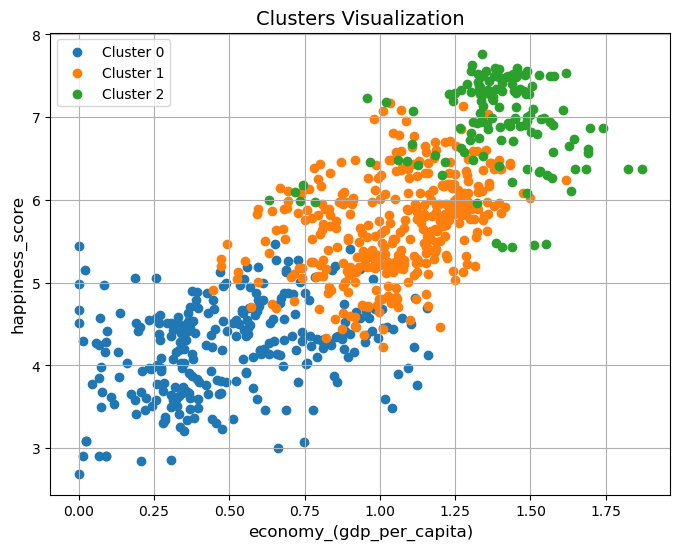

In [41]:
# Choosing two numerical features for visualization
x_feature = 'economy_(gdp_per_capita)' 
y_feature = 'happiness_score'  

# Scatter plot with cluster labels
plt.figure(figsize=(8, 6))
for cluster in range(3):  # Assuming k=3
    plt.scatter(
        df[df['Cluster'] == cluster][x_feature],
        df[df['Cluster'] == cluster][y_feature],
        label=f'Cluster {cluster}'
    )

# Add labels and title
plt.title('Clusters Visualization', fontsize=14)
plt.xlabel(x_feature, fontsize=12)
plt.ylabel(y_feature, fontsize=12)
plt.legend()
plt.grid()
plt.show()


#### 02 creatinng scatter plot using 'economy_(gdp_per_capita)', 'health_(life_expectancy)'

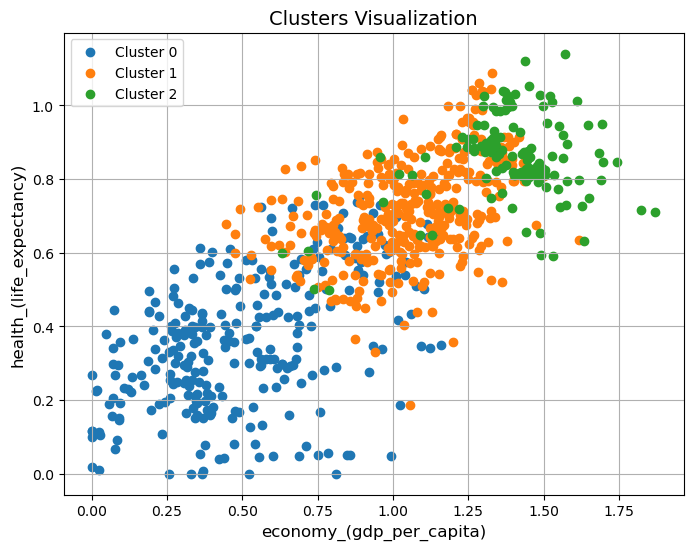

In [42]:
# Choosing two numerical features for visualization
x_feature = 'economy_(gdp_per_capita)'  
y_feature = 'health_(life_expectancy)'  

# Scatter plot with cluster labels
plt.figure(figsize=(8, 6))
for cluster in range(3):  # Assuming k=3
    plt.scatter(
        df[df['Cluster'] == cluster][x_feature],
        df[df['Cluster'] == cluster][y_feature],
        label=f'Cluster {cluster}'
    )

# Add labels and title
plt.title('Clusters Visualization', fontsize=14)
plt.xlabel(x_feature, fontsize=12)
plt.ylabel(y_feature, fontsize=12)
plt.legend()
plt.grid()
plt.show()


#### 03 creatinng scatter plot using 'family', 'freedom'

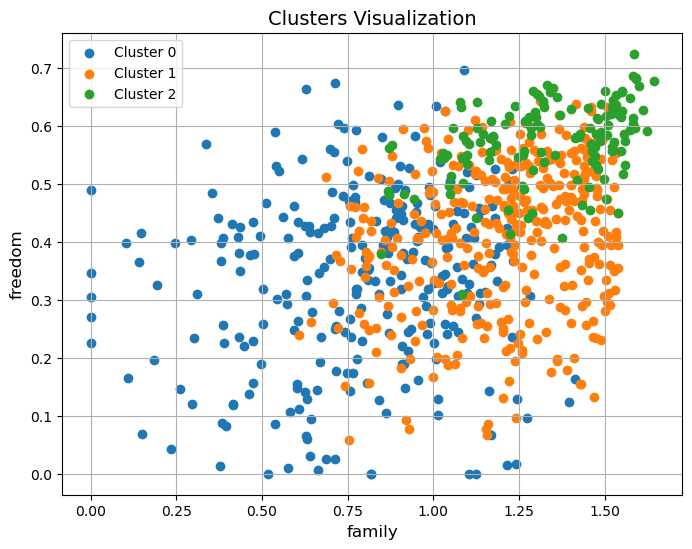

In [43]:
# Choosing two numerical features for visualization
x_feature = 'family'  
y_feature = 'freedom'  

# Scatter plot with cluster labels
plt.figure(figsize=(8, 6))
for cluster in range(3):  # Assuming k=3
    plt.scatter(
        df[df['Cluster'] == cluster][x_feature],
        df[df['Cluster'] == cluster][y_feature],
        label=f'Cluster {cluster}'
    )

# Add labels and title
plt.title('Clusters Visualization', fontsize=14)
plt.xlabel(x_feature, fontsize=12)
plt.ylabel(y_feature, fontsize=12)
plt.legend()
plt.grid()
plt.show()


## Interpretation of the Clusters
### Plot 1: Happiness Score vs. Economy (GDP per Capita)
#### Cluster 0 (Blue):
##### Countries in this cluster tend to have lower GDP per capita and lower happiness scores.
##### Likely represents economically underdeveloped countries with limited access to resources and opportunities for well-being.
#### Cluster 1 (Orange):
##### Represents a middle range of GDP per capita and happiness scores.
#### # These countries may have moderately strong economies and some factors that positively influence happiness.
#### Cluster 2 (Green):
##### These countries have the highest GDP per capita and happiness scores.
#### Likely to be economically developed nations where resources, healthcare, and societal support systems positively influence well-being.
##### This clustering aligns with the idea that a strong economy often correlates with higher happiness levels, as GDP per capita reflects access to goods, services, and infrastructure.

### Plot 2: Health (Life Expectancy) vs. Economy (GDP per Capita)
#### Cluster 0 (Blue):
##### Countries in this cluster exhibit both low GDP per capita and lower life expectancy.
##### This is expected, as poorer economies often struggle with healthcare access and quality, which impacts life expectancy.
#### Cluster 1 (Orange):
##### Countries with moderate GDP per capita and average life expectancy.
##### These countries may have functioning healthcare systems, though not at the same level as more developed nations.
#### Cluster 2 (Green):
##### High GDP per capita and high life expectancy.
##### Indicates developed countries with advanced healthcare infrastructure, better public health policies, and high living standards.
##### This makes sense because life expectancy is heavily influenced by healthcare systems, which are often better in wealthier nations.

### Insights
#### Clusters are meaningful: The clustering results align with known socioeconomic patterns. Countries with stronger economies and better healthcare systems typically have higher happiness scores and life expectancy.
#### Possible next steps: 
##### Investigate outliers within clusters to see if certain countries deviate from expected trends (e.g., a country with high GDP but low happiness).
##### Explore other variables (e.g., freedom or trust) to understand additional drivers of happiness and well-being.

In [53]:
# Descriptive Statistics
df.groupby('Cluster').agg({'happiness_score':['mean', 'median'], 
                         'economy_(gdp_per_capita)':['mean', 'median'], 
                         'health_(life_expectancy)':['mean', 'median']})

happiness_score        economy_(gdp_per_capita)           \
                   mean median                     mean   median   
Cluster                                                            
0              4.213480  4.286                 0.501160  0.46534   
1              5.676992  5.716                 1.050431  1.06353   
2              6.927212  6.985                 1.386305  1.39800   

        health_(life_expectancy)           
                            mean   median  
Cluster                                    
0                       0.355981  0.34745  
1                       0.715644  0.70600  
2                       0.853950  0.86100

### Conclusion: 
#### Cluster 0 likely represents economically underdeveloped countries with low access to resources, healthcare, and opportunities for happiness.
#### Cluster 1 represents countries with growing economies and improving healthcare, which lead to moderate happiness levels
#### Cluster 2 represents economically developed countries with robust healthcare systems, leading to higher happiness levels.

### Applications of These Results in Future Analytics Pipelines
##### The clustering and descriptive statistics analysis reveal distinct groupings of countries based on their happiness scores, economic development, and health metrics. These insights can guide various future analytics steps and real-world applications, including policymaking, targeted interventions, and business strategies.